# Look at CESM2 precipitation fields since they seem to contribute to the excess snow-sea ice formation

In [103]:
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import cesm2_ensemble_members, region_names
from nemo_python_git.grid import region_mask
from nemo_python_git.utils import fix_lon_range

In [104]:
base_dir  = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
era5_dir  = f'{base_dir}ERA5-forcing/daily/files/processed/'
cesm2_dir = f'{base_dir}climate-forcing/CESM2/LE2/'

Load CESM2 files:

In [105]:
ds_PRECT      = xr.open_mfdataset(f'{cesm2_dir}processed/CESM2-LE2_ens1011.001_PRECT_y192*').sel(lat=slice(-90,-50)).sortby('lon').mean('time')
ds_PRECS      = xr.open_mfdataset(f'{cesm2_dir}processed/CESM2-LE2_ens1011.001_PRECS_y192*').sel(lat=slice(-90,-50)).sortby('lon').mean('time')
ds_PRECT_bias = xr.open_mfdataset(f'{cesm2_dir}bias-corrected/CESM2-LE2_ens1011.001_PRECT_bias_corr_monthly_y192*').sel(lat=slice(-90,-50)).sortby('lon').mean('time')
ds_PRECS_bias = xr.open_mfdataset(f'{cesm2_dir}bias-corrected/CESM2-LE2_ens1011.001_PRECS_bias_corr_monthly_y192*').sel(lat=slice(-90,-50)).sortby('lon').mean('time')

ds_mtpr = xr.open_dataset(f'{era5_dir}mtpr_time_y1980.nc').rename({'latitude':'lat','longitude':'lon'}).sortby('lat').sel(lat=slice(-90,-50)).mean('time')
ds_msr  = xr.open_dataset(f'{era5_dir}msr_time_y1980.nc').rename({'latitude':'lat','longitude':'lon'}).sortby('lat').sel(lat=slice(-90,-50)).mean('time')

In [111]:
def compare_precip(ds_CESM2, ds_CESM2_bias, ds_ERA5, variable, vmin=0, vmax=1e-4, ylim=(-80,-60), xlim=(-180, 180), figsize=(14,12), subplots=(3,1)):
    ERA5_varnames={'PRECT':'mtpr', 'PRECS':'msr'}
    settings = {'vmin':vmin, 'vmax':vmax, 'ylim':ylim, 'xlim':xlim}
    
    fig, ax = plt.subplots(subplots[0], subplots[1], figsize=figsize)
    ds_CESM2[variable].plot(ax=ax[0], **settings)
    ds_CESM2_bias[variable].plot(ax=ax[1], **settings)
    ds_ERA5[ERA5_varnames[variable]].plot(ax=ax[2], **settings)
    
    titles=['CESM2 processed', 'CESM2 bias corrected', 'ERA5']
    for a, axis in enumerate(ax.ravel()):
        axis.set_title(titles[a])
        axis.set_xlabel('')
        axis.set_ylabel('')
    
    return

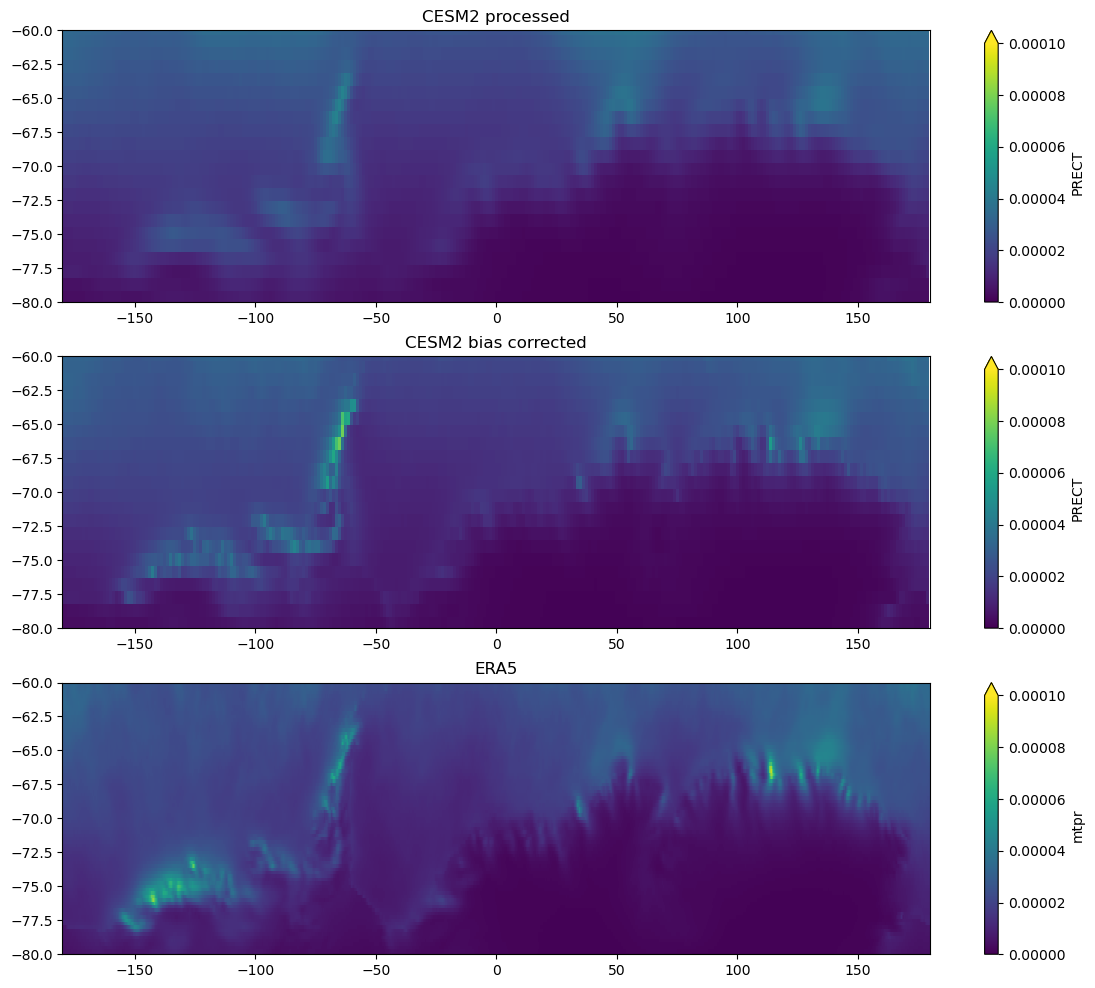

In [108]:
compare_precip(ds_PRECT, ds_PRECT_bias, ds_mtpr, 'PRECT')

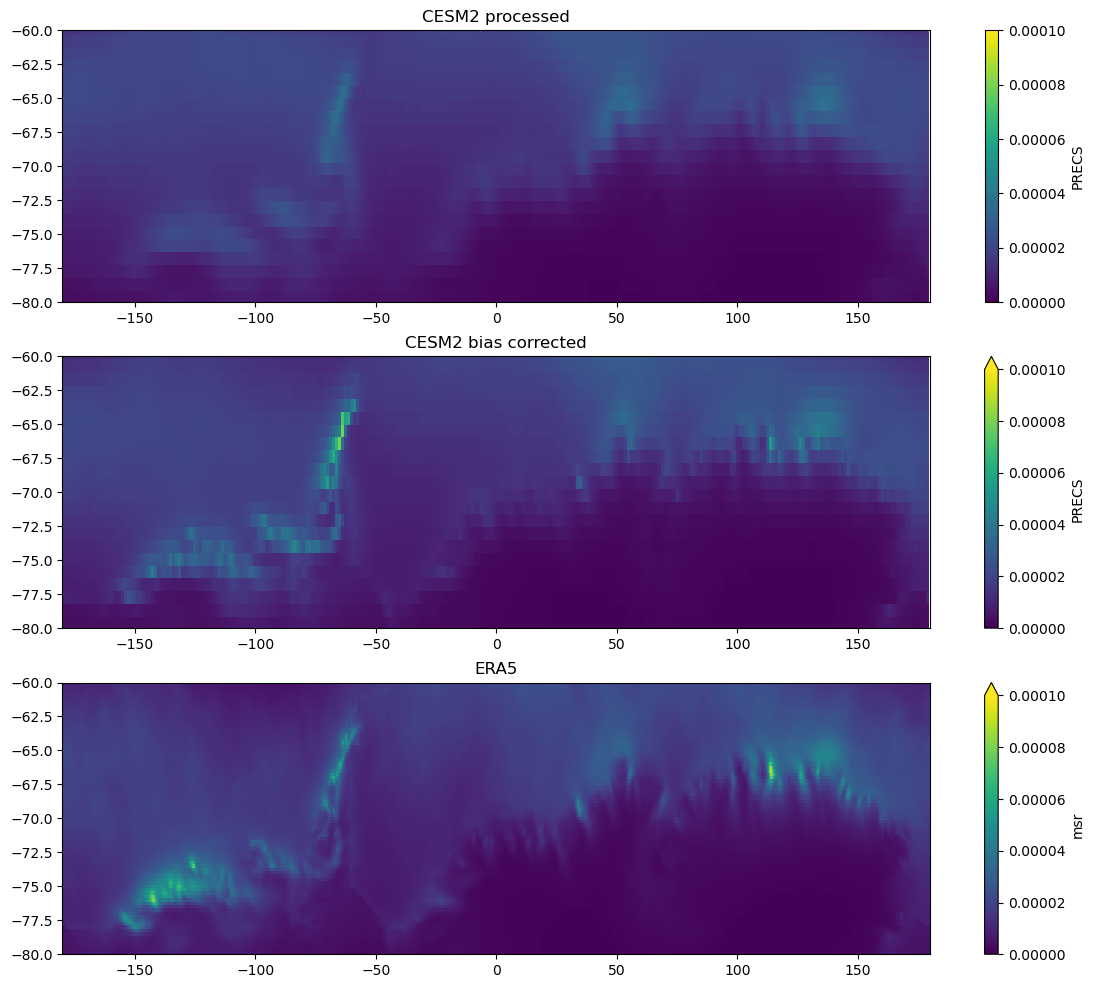

In [109]:
compare_precip(ds_PRECS, ds_PRECS_bias, ds_msr, 'PRECS')

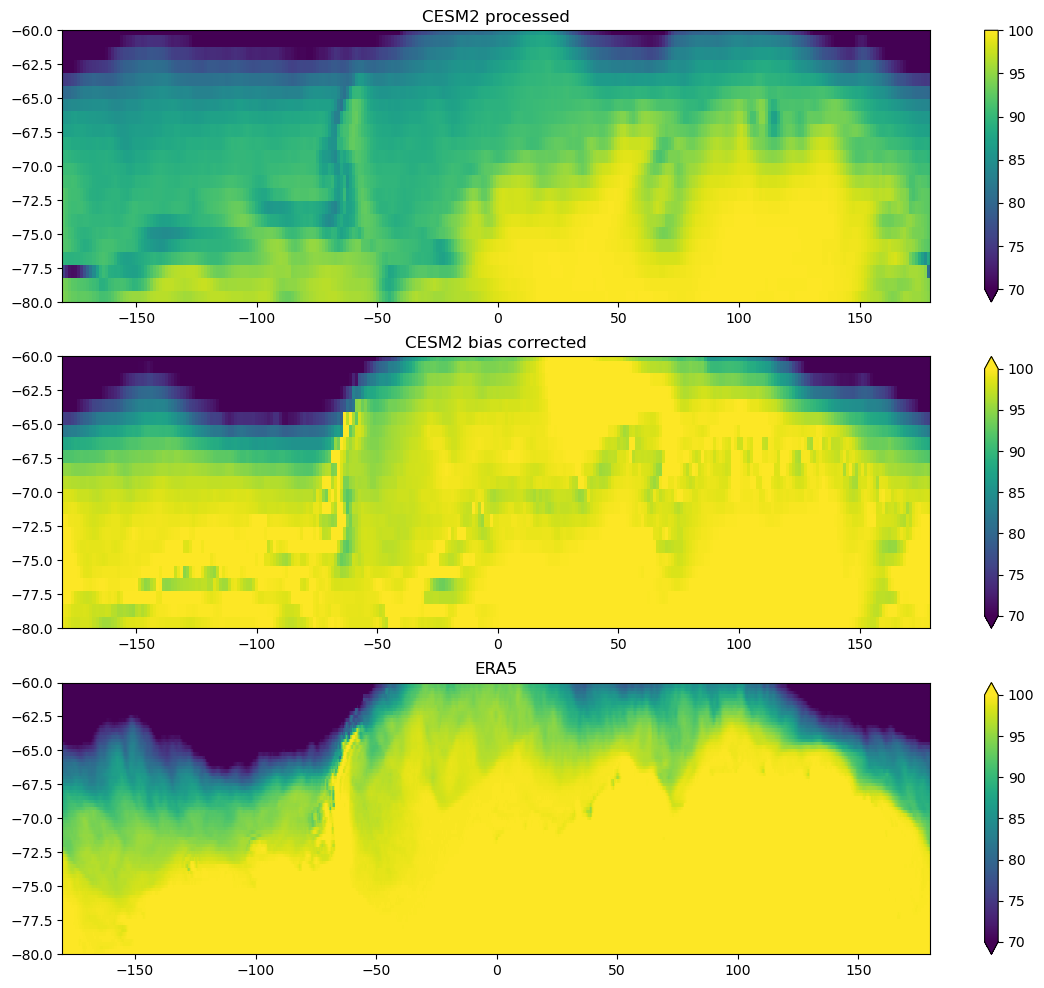

In [120]:
settings = {'vmin':70, 'vmax':100, 'ylim':(-80,-60)}

fig, ax = plt.subplots(3,1, figsize=(14,12))
((ds_PRECS.PRECS/ds_PRECT.PRECT)*100).plot(ax=ax[0], **settings)
((ds_PRECS_bias.PRECS/ds_PRECT_bias.PRECT)*100).plot(ax=ax[1], **settings)
((ds_msr.msr/ds_mtpr.mtpr)*100).plot(ax=ax[2], **settings)

a=['CESM2 processed', 'CESM2 bias corrected', 'ERA5']
for a, axis in enumerate(ax.ravel()):
    axis.set_title(titles[a])
    axis.set_xlabel('')
    axis.set_ylabel('')

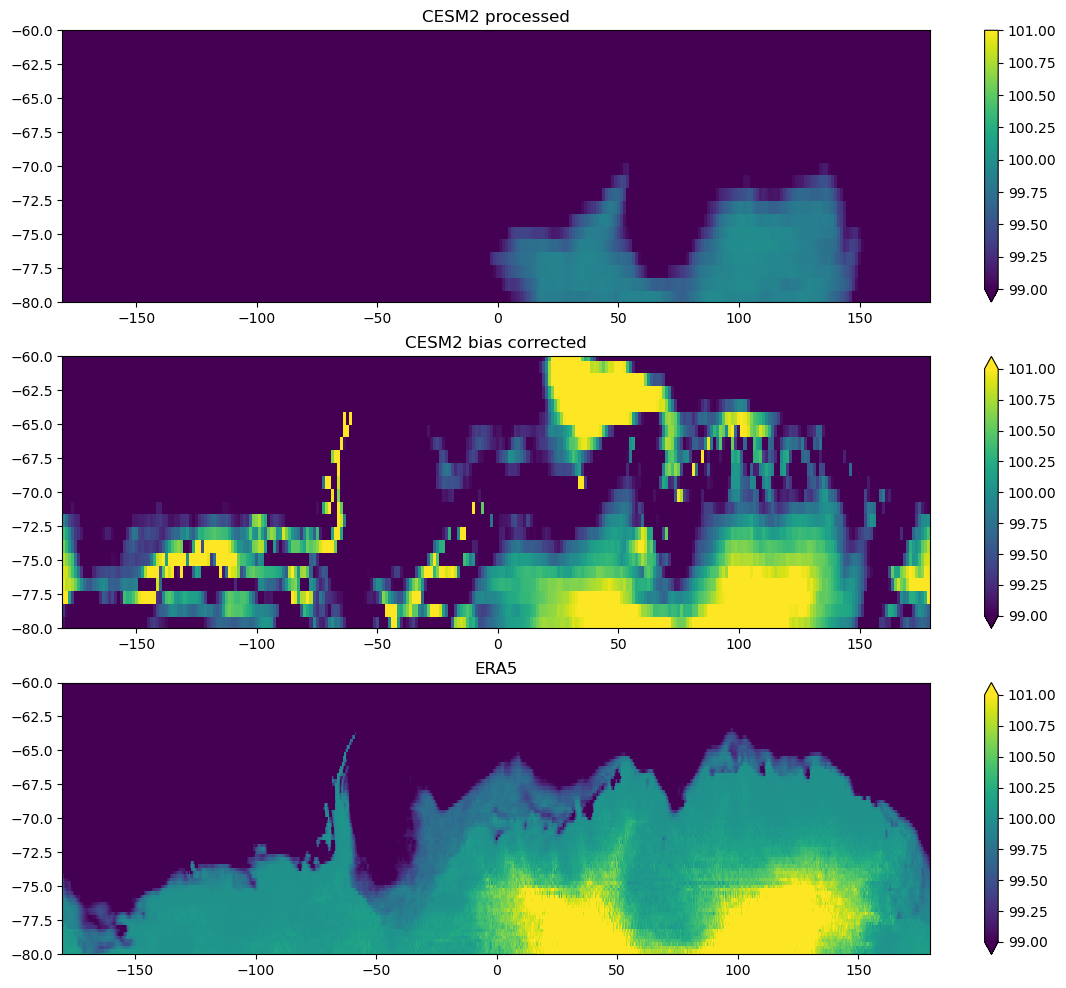

In [126]:
settings = {'vmin':99, 'vmax':101, 'ylim':(-80,-60)}

fig, ax = plt.subplots(3,1, figsize=(14,12))
((ds_PRECS.PRECS/ds_PRECT.PRECT)*100).plot(ax=ax[0], **settings)
((ds_PRECS_bias.PRECS/ds_PRECT_bias.PRECT)*100).plot(ax=ax[1], **settings)
((ds_msr.msr/ds_mtpr.mtpr)*100).plot(ax=ax[2], **settings)

a=['CESM2 processed', 'CESM2 bias corrected', 'ERA5']
for a, axis in enumerate(ax.ravel()):
    axis.set_title(titles[a])
    axis.set_xlabel('')
    axis.set_ylabel('')

In [125]:
print((ds_PRECS.PRECS/ds_PRECT.PRECT).max().values)
print((ds_PRECS_bias.PRECS/ds_PRECT_bias.PRECT).max().values)
print((ds_msr.msr/ds_mtpr.mtpr).max().values)

0.99977654
1.0396470281557468
1.0394558906555176


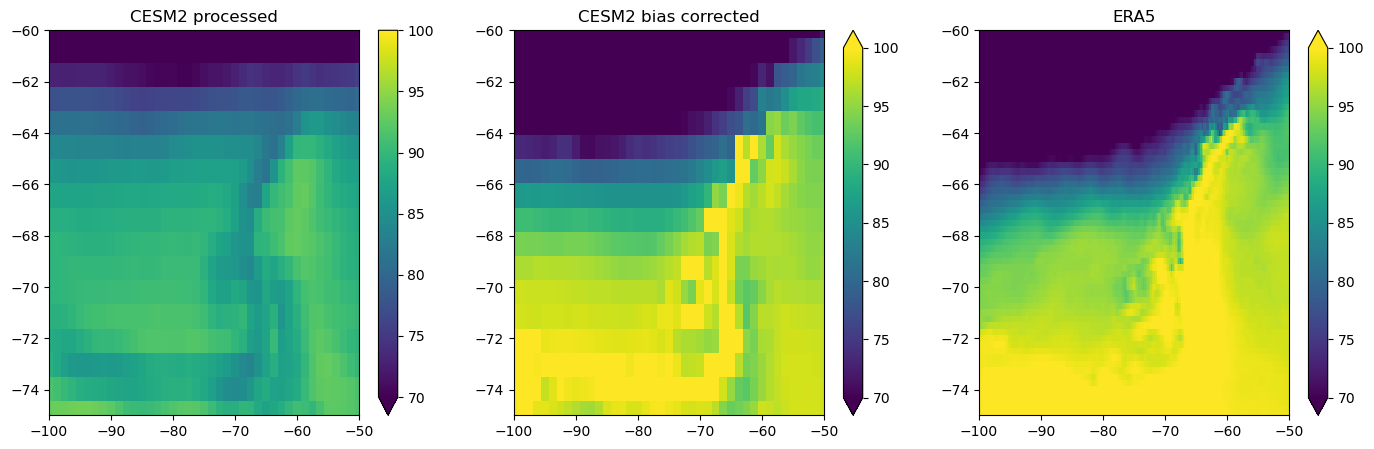

In [122]:
settings = {'vmin':70, 'vmax':100, 'ylim':(-75,-60), 'xlim':(-100,-50)}

fig, ax = plt.subplots(1,3, figsize=(17,5))
((ds_PRECS.PRECS/ds_PRECT.PRECT)*100).plot(ax=ax[0], **settings)
((ds_PRECS_bias.PRECS/ds_PRECT_bias.PRECT)*100).plot(ax=ax[1], **settings)
((ds_msr.msr/ds_mtpr.mtpr)*100).plot(ax=ax[2], **settings)

a=['CESM2 processed', 'CESM2 bias corrected', 'ERA5']
for a, axis in enumerate(ax.ravel()):
    axis.set_title(titles[a])
    axis.set_xlabel('')
    axis.set_ylabel('')

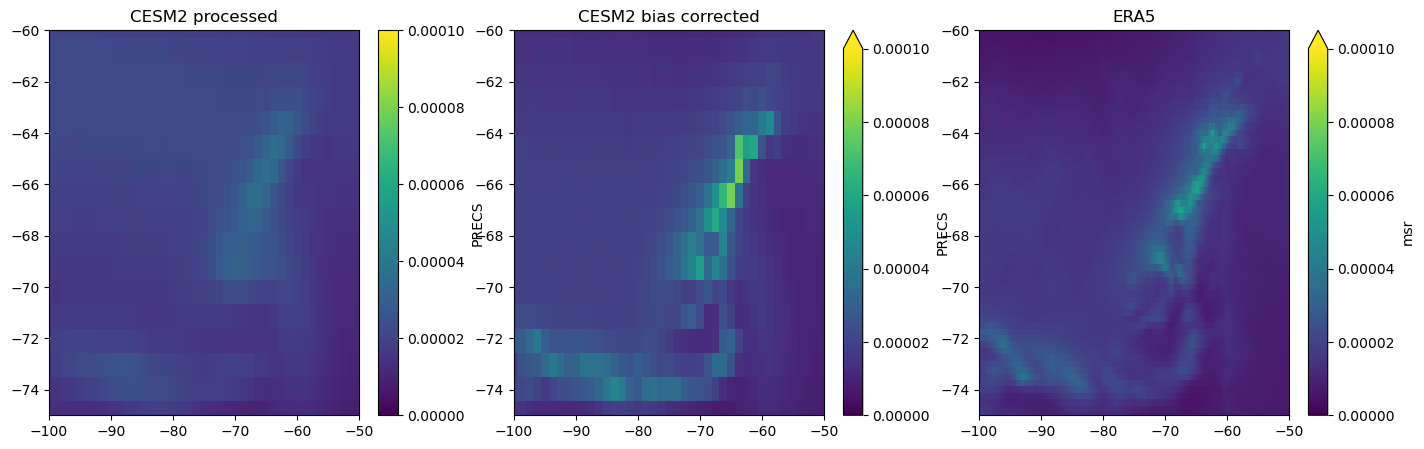

In [113]:
compare_precip(ds_PRECS, ds_PRECS_bias, ds_msr, 'PRECS', xlim=(-100,-50), ylim=(-75,-60), subplots=(1,3), figsize=(17,5))

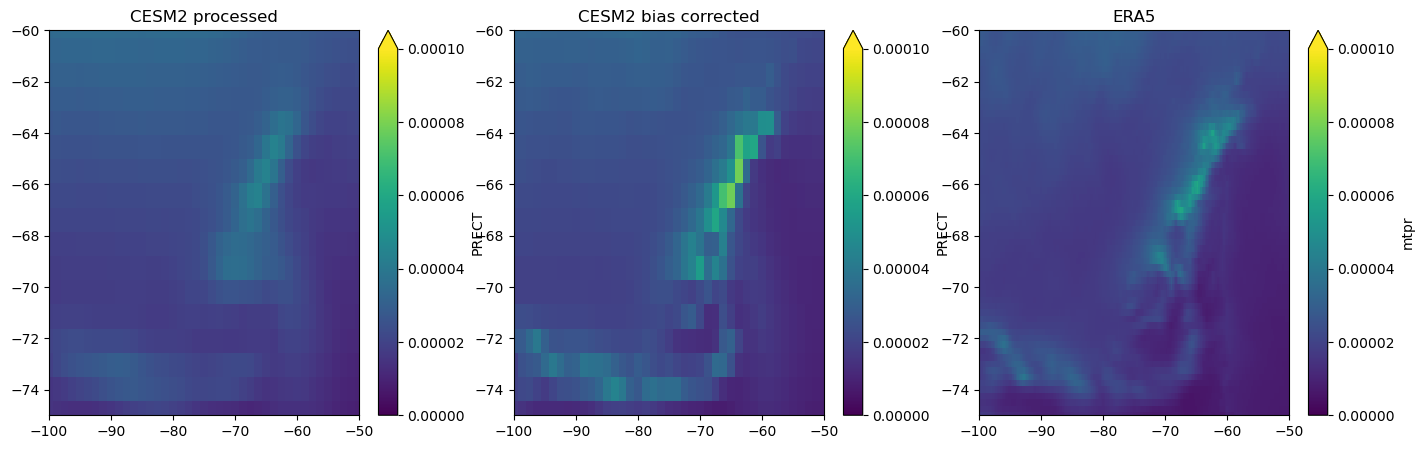

In [114]:
compare_precip(ds_PRECT, ds_PRECT_bias, ds_mtpr, 'PRECT', xlim=(-100,-50), ylim=(-75,-60), subplots=(1,3), figsize=(17,5))

### Let's look instead at the seasonal cycle and magnitude of precipitation based on that:

In [97]:
ds_PRECT      = xr.open_mfdataset(f'{cesm2_dir}processed/CESM2-LE2_ens1011.001_PRECT_y192*').sortby('lon').sel(lat=slice(-80,-50)).groupby("time.month").mean()
ds_PRECS      = xr.open_mfdataset(f'{cesm2_dir}processed/CESM2-LE2_ens1011.001_PRECS_y192*').sortby('lon').sel(lat=slice(-80,-50)).groupby("time.month").mean()
ds_PRECT_bias = xr.open_mfdataset(f'{cesm2_dir}bias-corrected/CESM2-LE2_ens1011.001_PRECT_bias_corr_monthly_y192*').sortby('lon').sel(lat=slice(-80,-50)).groupby("time.month").mean()
ds_PRECS_bias = xr.open_mfdataset(f'{cesm2_dir}bias-corrected/CESM2-LE2_ens1011.001_PRECS_bias_corr_monthly_y192*').sortby('lon').sel(lat=slice(-80,-50)).groupby("time.month").mean()

ds_mtpr = xr.open_dataset(f'{era5_dir}mtpr_time_y1980.nc').rename({'latitude':'lat','longitude':'lon'}).sortby('lat').sel(lat=slice(-80,-50)).groupby("time.month").mean()
ds_msr  = xr.open_dataset(f'{era5_dir}msr_time_y1980.nc').rename({'latitude':'lat','longitude':'lon'}).sortby('lat').sel(lat=slice(-80,-50)).groupby("time.month").mean()

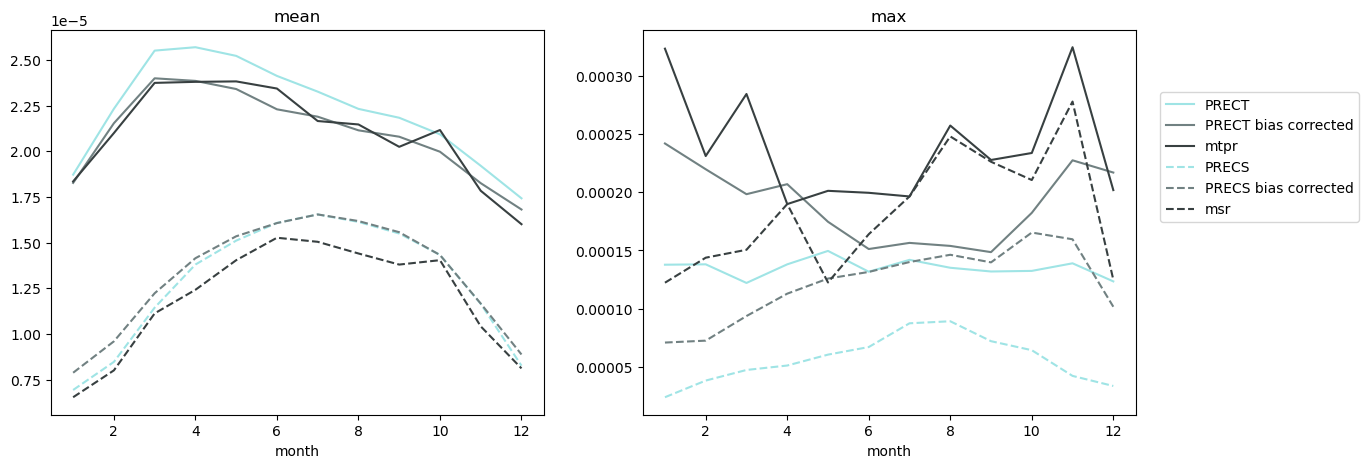

In [99]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(ds_PRECT.month     , ds_PRECT.mean(dim=['lon','lat']).PRECT     , c='#9fe4e5')
ax[0].plot(ds_PRECT_bias.month, ds_PRECT_bias.mean(dim=['lon','lat']).PRECT, c='#718182')
ax[0].plot(ds_mtpr.month      , ds_mtpr.mean(dim=['lon','lat']).mtpr       , c='#384041')
ax[0].plot(ds_PRECS.month     , ds_PRECS.mean(dim=['lon','lat']).PRECS     , c='#9fe4e5', linestyle='--')
ax[0].plot(ds_PRECS_bias.month, ds_PRECS_bias.mean(dim=['lon','lat']).PRECS, c='#718182', linestyle='--')
ax[0].plot(ds_msr.month       , ds_msr.mean(dim=['lon','lat']).msr         , c='#384041', linestyle='--')

ax[1].plot(ds_PRECT.month     , ds_PRECT.max(dim=['lon','lat']).PRECT     , label='PRECT'               , c='#9fe4e5')
ax[1].plot(ds_PRECT_bias.month, ds_PRECT_bias.max(dim=['lon','lat']).PRECT, label='PRECT bias corrected', c='#718182')
ax[1].plot(ds_mtpr.month      , ds_mtpr.max(dim=['lon','lat']).mtpr       , label='mtpr'                , c='#384041')
ax[1].plot(ds_PRECS.month     , ds_PRECS.max(dim=['lon','lat']).PRECS     , label='PRECS'               , c='#9fe4e5', linestyle='--')
ax[1].plot(ds_PRECS_bias.month, ds_PRECS_bias.max(dim=['lon','lat']).PRECS, label='PRECS bias corrected', c='#718182', linestyle='--')
ax[1].plot(ds_msr.month       , ds_msr.max(dim=['lon','lat']).msr         , label='msr'                 , c='#384041', linestyle='--')

ax[1].legend(loc=(1.05, 0.5))
ax[0].set_title('mean')
ax[1].set_title('max')

for axis in ax.ravel():
    axis.set_xlabel('month')

In [100]:
ds_PRECT      = xr.open_mfdataset(f'{cesm2_dir}processed/CESM2-LE2_ens1011.001_PRECT_y192*').sortby('lon').sel(lat=slice(-75,-60), lon=slice(-100,-50)).groupby("time.month").mean()
ds_PRECS      = xr.open_mfdataset(f'{cesm2_dir}processed/CESM2-LE2_ens1011.001_PRECS_y192*').sortby('lon').sel(lat=slice(-75,-60),lon=slice(-100,-50)).groupby("time.month").mean()
ds_PRECT_bias = xr.open_mfdataset(f'{cesm2_dir}bias-corrected/CESM2-LE2_ens1011.001_PRECT_bias_corr_monthly_y192*').sortby('lon').sel(lat=slice(-75,-60), lon=slice(-100,-50)).groupby("time.month").mean()
ds_PRECS_bias = xr.open_mfdataset(f'{cesm2_dir}bias-corrected/CESM2-LE2_ens1011.001_PRECS_bias_corr_monthly_y192*').sortby('lon').sel(lat=slice(-75,-60), lon=slice(-100,-50)).groupby("time.month").mean()

ds_mtpr = xr.open_dataset(f'{era5_dir}mtpr_time_y1980.nc').rename({'latitude':'lat','longitude':'lon'}).sortby('lat').sel(lat=slice(-75,-60), lon=slice(-100,-50)).groupby("time.month").mean()
ds_msr  = xr.open_dataset(f'{era5_dir}msr_time_y1980.nc').rename({'latitude':'lat','longitude':'lon'}).sortby('lat').sel(lat=slice(-75,-60), lon=slice(-100,-50)).groupby("time.month").mean()

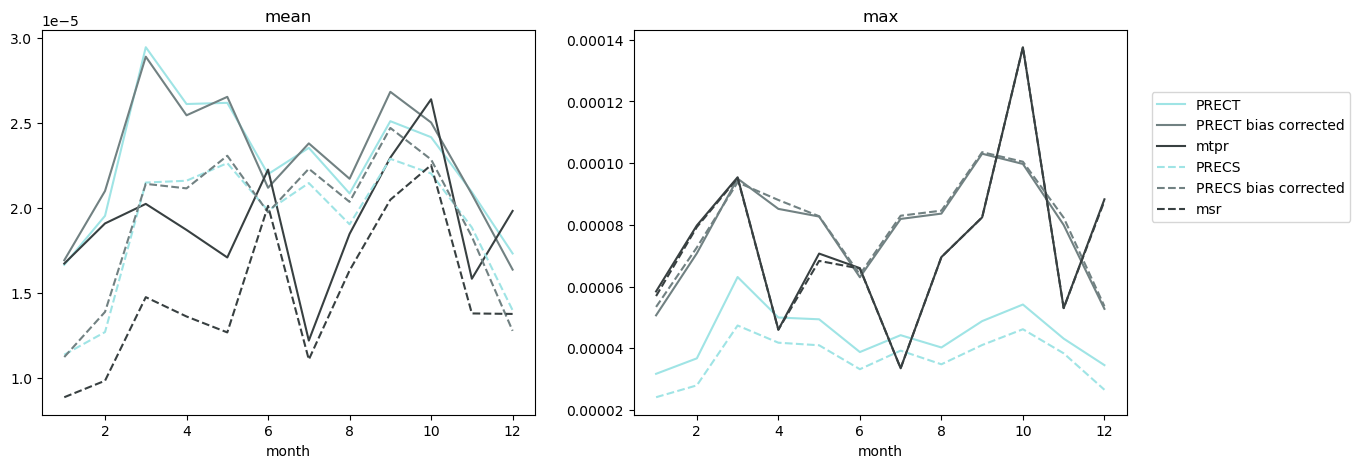

In [101]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(ds_PRECT.month     , ds_PRECT.mean(dim=['lon','lat']).PRECT     , c='#9fe4e5')
ax[0].plot(ds_PRECT_bias.month, ds_PRECT_bias.mean(dim=['lon','lat']).PRECT, c='#718182')
ax[0].plot(ds_mtpr.month      , ds_mtpr.mean(dim=['lon','lat']).mtpr       , c='#384041')
ax[0].plot(ds_PRECS.month     , ds_PRECS.mean(dim=['lon','lat']).PRECS     , c='#9fe4e5', linestyle='--')
ax[0].plot(ds_PRECS_bias.month, ds_PRECS_bias.mean(dim=['lon','lat']).PRECS, c='#718182', linestyle='--')
ax[0].plot(ds_msr.month       , ds_msr.mean(dim=['lon','lat']).msr         , c='#384041', linestyle='--')

ax[1].plot(ds_PRECT.month     , ds_PRECT.max(dim=['lon','lat']).PRECT     , label='PRECT'               , c='#9fe4e5')
ax[1].plot(ds_PRECT_bias.month, ds_PRECT_bias.max(dim=['lon','lat']).PRECT, label='PRECT bias corrected', c='#718182')
ax[1].plot(ds_mtpr.month      , ds_mtpr.max(dim=['lon','lat']).mtpr       , label='mtpr'                , c='#384041')
ax[1].plot(ds_PRECS.month     , ds_PRECS.max(dim=['lon','lat']).PRECS     , label='PRECS'               , c='#9fe4e5', linestyle='--')
ax[1].plot(ds_PRECS_bias.month, ds_PRECS_bias.max(dim=['lon','lat']).PRECS, label='PRECS bias corrected', c='#718182', linestyle='--')
ax[1].plot(ds_msr.month       , ds_msr.max(dim=['lon','lat']).msr         , label='msr'                 , c='#384041', linestyle='--')

ax[1].legend(loc=(1.05, 0.5))
ax[0].set_title('mean')
ax[1].set_title('max')

for axis in ax.ravel():
    axis.set_xlabel('month')